In [70]:
import cv2
import matplotlib.pyplot as plt

## In this experiment, I want to perform logo detection using simple contour operations
### To do this, I have template images of facebook and twitter logos and I have a test image that has the logos in them. I want to see how well can I identify the logos

In [71]:
# load the template image. here I want to check for the Facebook and the Twitter logo
fb_logo = cv2.imread("./data/fb_logo.png")
twtitter_logo = cv2.imread("./data/twitter_logo.jpg")
# convert to grayscale
gray_fb_logo =cv2.cvtColor(fb_logo, cv2.COLOR_BGR2GRAY) 
gray_twitter_logo =cv2.cvtColor(twtitter_logo, cv2.COLOR_BGR2GRAY) 
# perform thresholding
ret,thresh_fb_logo = cv2.threshold(gray_fb_logo,127,255,cv2.THRESH_BINARY)
ret,thresh_twit_logo = cv2.threshold(gray_twitter_logo,127,255,cv2.THRESH_BINARY)
# find contours
cnts_fb, _ = cv2.findContours(thresh_fb_logo.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
cnts_twit, _ = cv2.findContours(thresh_twit_logo.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]

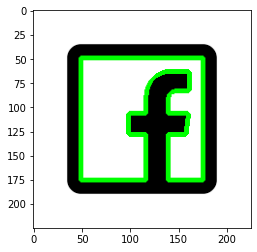

In [72]:
# sort the contours and take the one that represents the shape of the logo
shape_fb = sorted(cnts_fb, key = cv2.contourArea, reverse = True)[2]
shape_twit = sorted(cnts_twit, key = cv2.contourArea, reverse = True)[1]

# display
cv2.drawContours(fb_logo, [shape_fb], 0, (0,255,0), 3)
plt.imshow(fb_logo)
plt.show()

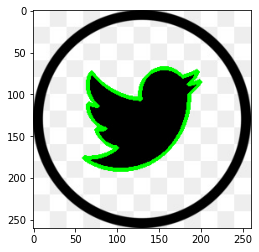

In [73]:
# display
cv2.drawContours(twtitter_logo, [shape_twit], 0, (0,255,0), 3)
plt.imshow(twtitter_logo)
plt.show()

### I have captured the contour information of the logos, next I will try to detext similar shapes in my test image

In [74]:
# load the test image
test_img = cv2.imread("/home/rajdeep/self_study/my_git/explore-image-processing/data/index.jpeg")
# convert to grayscale
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
# perform thresholding
ret,thresh = cv2.threshold(gray,127,255,1)
# detect contours
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2:]

# initialise the variables
match_fb = 100
match_twitter = 100
closest_fb_match = None
closest_twit_match = None

for cnt in cnts:
    # get match index
    match_score = cv2.matchShapes(shape_fb,cnt,1,0.0)
    
    if  match_score < 0.8 and match_score <= match_fb:
        match_fb = match_score
        closest_fb_match = cnt
        
    match_score = cv2.matchShapes(shape_twit,cnt,1,0.0)  
    if match_score < 0.3 and match_score <= match_twitter:
        match_twitter = match_score
        closest_twit_match = cnt
    

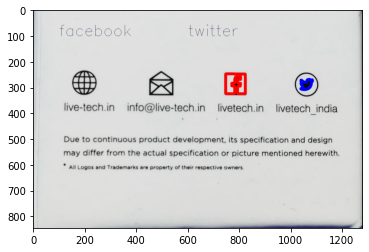

In [75]:
if closest_fb_match is not None:
    cv2.drawContours(test_img, [closest_fb_match], 0, (255,0,0), 10)
    cv2.putText(test_img, "facebook",(100,100),cv2.FONT_HERSHEY_SIMPLEX,fontScale=2,color=(10,20,50) )
    
if closest_twit_match is not None:
    cv2.putText(test_img, "twitter",(600,100),cv2.FONT_HERSHEY_SIMPLEX,fontScale=2,color=(10,20,50) )
    cv2.drawContours(test_img, [closest_twit_match], 0, (0,0,255), 10)
    
plt.imshow(test_img)
plt.show()

### Well, it works!